In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

import glob
import os

from tqdm.notebook import tqdm

In [7]:
metadata = pd.read_excel("/mnt/c/Users/conor/Google Drive/PhD/Project with Janet/Scoring grids Advancing Front (TMAs 1-3).xlsx", sheet_name = "reformatted")
asma = pd.read_excel("/mnt/c/Users/conor/Google Drive/PhD/Project with Janet/ASMA.xlsx", sheet_name = "Sheet3")

metadata = metadata.merge(asma, left_on = "Patient_nu ", right_on = "Case ID")

In [9]:
mask_folder = 'Creating_Masks/Original/Masks/*.png'
output_folder = '/mnt/c/Users/conor/Git_Projects/PHD/Creating_Masks/Original/Data/'
ftir_folder = '/mnt/c/Users/conor/OneDrive/Desktop/temp_extraction_new/'


for image_name in tqdm(glob.glob(ftir_folder + '*.hdf')):

    df = pd.read_hdf(image_name, key='Data')

    try:
        ftir = df.values.reshape(256,256,-1)[:,:,169]
    except:
        ftir = df.values.reshape(128,256,-1)[:,:,169]


    fn = image_name[:-4] + '.png'

    print(fn)
    plt.imsave(fn, ftir, cmap='gray')

In [11]:
image_name

'Creating_Masks/Original/Masks/TMA_1_10.png'

In [12]:
for image_name in tqdm(glob.glob(mask_folder)):

    print(image_name.split('/')[-1][:-4])
    mask = mpl.image.imread(image_name)[:,:,0]

    save_name = output_folder + image_name.split('/')[-1][:-4] + '.hdf'

    if os.path.exists(save_name):

        continue

    df = pd.read_hdf(ftir_folder + image_name.split('/')[-1][:-4] + '.hdf', key='Data')

    if df.shape[0] > 0:
    
        df.iloc[(mask.flatten()==1),:].to_hdf(save_name, key='Data')

TMA_1_A10
TMA_1_A12
TMA_1_A5
TMA_1_A6
TMA_1_A7
TMA_1_A9
TMA_1_C11
TMA_1_C12
TMA_1_C3
TMA_1_C5
TMA_1_C6
TMA_1_D10
TMA_1_D3
TMA_1_D4
TMA_1_D5
TMA_1_D9
TMA_1_E11
TMA_1_E14
TMA_1_F10
TMA_1_F13
TMA_1_F14
TMA_1_F5
TMA_1_F6
TMA_1_F7
TMA_1_G13
TMA_1_G2
TMA_1_G9
TMA_2_A1
TMA_2_A2
TMA_2_A8
TMA_2_B1
TMA_2_B4
TMA_2_B5
TMA_2_B6
TMA_2_B7
TMA_2_B8
TMA_2_C1
TMA_2_C10
TMA_2_C3
TMA_2_C4
TMA_2_C5
TMA_2_C6
TMA_2_C7
TMA_2_C9
TMA_2_D10
TMA_2_D2
TMA_2_D3
TMA_2_D4
TMA_2_D5
TMA_2_D6
TMA_2_D7
TMA_2_D9
TMA_2_E1
TMA_2_E2
TMA_2_E3
TMA_2_E5
TMA_2_E7
TMA_2_E8
TMA_2_E9
TMA_2_F1
TMA_2_F10
TMA_2_F13
TMA_2_F14
TMA_2_F2
TMA_2_F3
TMA_2_F8
TMA_2_F9
TMA_2_G10
TMA_2_G11
TMA_2_G12
TMA_2_G13
TMA_2_G2
TMA_2_G3
TMA_2_G4
TMA_2_G8
TMA_2_G9
TMA_2_H1
TMA_2_H11
TMA_2_H2
TMA_2_H9
TMA_2_I2



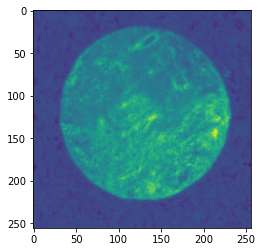

In [7]:
plt.imshow(df.values.reshape(256,256,-1)[:,:,169])

In [6]:
df = pd.read_hdf(ftir_folder + 'TMA_2_C3' + '.hdf', key='Data')

<AxesSubplot:>

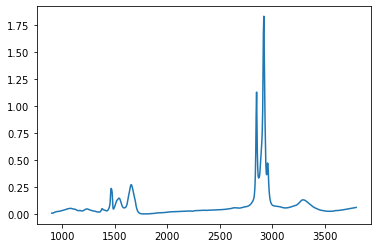

In [35]:
df.iloc[(mask.flatten()==1),:].mean().plot()

for file_ in tqdm(glob.glob('/mnt/c/Users/conor/OneDrive/Desktop/temp_extraction_test/*.hdf')):

    try:
        df = pd.read_hdf(file_, key='Data')

    except:
        continue

    tma = np.unique(df.reset_index()['TMA'])[0][-1]
    core = np.unique(df.reset_index()['Disk'])[0][8:]

    df.to_hdf(f'/mnt/c/Users/conor/OneDrive/Desktop/temp_extraction_new/TMA_{tma}_{core}.hdf', key='Data')